<a href="https://colab.research.google.com/github/siddanagoudampatil/bus-route-number-detection/blob/master/easyOCR-busRouteNumberDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

In [ ]:
!pip3 install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt  # install dependencies
!pip3 install Pillow==9.0.0
!pip3 install gTTs
!pip3 install opencv-python
!pip3 install easyocr

In [ ]:
import torch
import numpy as np
import cv2
import imutils
from PIL import Image
from gtts import gTTS
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [ ]:
from google.colab import drive
import shutil

gDriveLink = '/content/drive/MyDrive/major-project/'

drive.mount('/content/drive')
shutil.copytree(gDriveLink, '/content/bus-route-number-detection/')

drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
%cp /content/bus-route-number-detection/best.pt /content/yolov5/

DETECTION USING THE "best.pt"

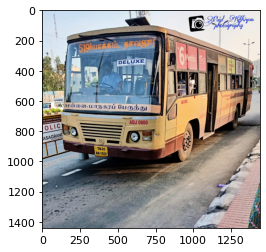

In [ ]:
# select a test image
test_image = '/content/img_476.jpg'

# opening the File
img = Image.open(test_image)
# convert to numpy array
img = np.array(img)
plt.imshow(img);

In [ ]:
# model
model = torch.hub.load('/content/yolov5', 'custom', path='/content/bus-route-number-detection/best.pt', source='local')

# inference
results = model(img)

# results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

YOLOv5 🚀 v6.1-289-g526e650 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


image 1/1: 320x431 (no detections)
Speed: 3.1ms pre-process, 16.4ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)


In [ ]:
bounding_box = results.pandas().xyxy[0]  # img predictions (pandas)

In [ ]:
display(bounding_box)

,xmin,ymin,xmax,ymax,confidence,class,name


In [ ]:
# xmin
x_min = int(bounding_box['xmin'][0])

# xmax
x_max = int(bounding_box['xmax'][0])

# ymin
y_min = int(bounding_box['ymin'][0])

# ymax
y_max = int(bounding_box['ymax'][0])

# use numpy slicing to crop the region of interest
roi = img[y_min:y_max,x_min:x_max]

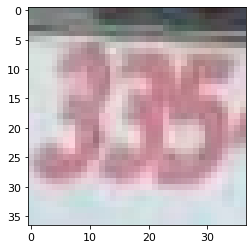

In [ ]:
# plot the region of interest
plt.imshow(roi);

In [ ]:
# # define a helper function to show image
# def show_pic(img):
#     fig = plt.figure(figsize=(15,15))
#     ax = fig.add_subplot(111)
#     ax.imshow(img,cmap='gray')

In [ ]:
# # define helper functions to preprocess the ROI
# # get grayscale image
# def get_grayscale(image):
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     return gray

# # thresholding
# def thresholding(image):
#     thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
#     return thresh

In [ ]:
# gray = get_grayscale(roi)
# thresh = thresholding(gray)

In [ ]:
# show_pic(gray)
# show_pic(thresh)

In [ ]:
# from google.colab.patches import cv2_imshow

# gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(gray, (5,5), 0)
# edged = cv2.Canny(blur, 10, 200)
# cv2_imshow(edged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

**PREPROCESSING THE ROI**

Invertion

In [ ]:
import cv2
from matplotlib import pyplot as plt

In [ ]:
inverted_image = cv2.bitwise_not(roi)
cv2.imwrite("temp/inverted.jpg", inverted_image)

True

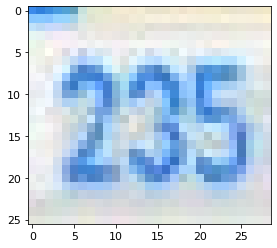

In [ ]:
img = cv2.imread('temp/inverted.jpg')
plt.imshow(img)

Binarization

In [ ]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
gray_image = grayscale(img)
cv2.imwrite("temp/gray.jpg", gray_image)

True

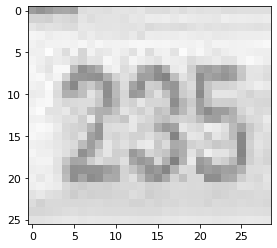

In [ ]:
gray_img = cv2.imread("temp/gray.jpg")
plt.imshow(gray_img)

In [ ]:
thresh, im_bw = cv2.threshold(gray_img, 120, 275, cv2.THRESH_BINARY)
cv2.imwrite("temp/bw_image.jpg", im_bw)

True

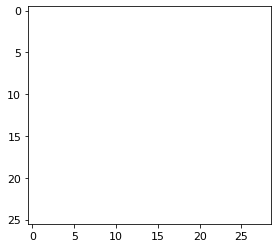

In [ ]:
bw_img = cv2.imread("temp/bw_image.jpg")
plt.imshow(bw_img)

Noise Removal

In [ ]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=10)
    kernel = np.ones((1, 2), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [ ]:
no_noise = noise_removal(bw_img)
cv2.imwrite("temp/no_noise.jpg", no_noise)

True

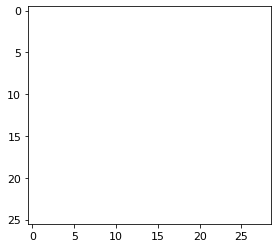

In [ ]:
nonoise_img = cv2.imread("temp/no_noise.jpg")
plt.imshow(nonoise_img)

thicken font

In [ ]:
# def thick_font(image):
#     import numpy as np
#     image = cv2.bitwise_not(image)
#     kernel = np.ones((1,1),np.uint8)
#     image = cv2.dilate(image, kernel, iterations=1)
#     image = cv2.bitwise_not(image)
#     return (image)

In [ ]:
# dilated_image = thick_font(nonoise_img)
# cv2.imwrite("temp/dilated_image.jpg", dilated_image)

True

In [ ]:
# thick_img = cv2.imread("temp/dilated_image.jpg")
# plt.imshow(thick_img)

In [ ]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2, 2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [ ]:
eroded_image = thin_font(nonoise_img)
cv2.imwrite("temp/eroded_image.jpg", eroded_image)

True

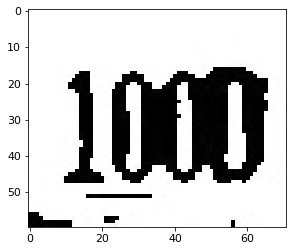

In [ ]:
thin_img = cv2.imread("temp/eroded_image.jpg")
plt.imshow(thin_img)

OCR

In [ ]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
image_path = thin_img
reader = easyocr.Reader(['en'], gpu = True)
text = reader.readtext(image_path)
if(len(text) == 0):
  route_number = "Route number not detected"
else:
  route_number = text[0][1]

print(route_number)

1000


**Text to Audio**

In [ ]:
audio_text = route_number
language = 'en'
audio_obj = gTTS(text=audio_text, lang=language, slow=False)
audio_obj.save("../bus_number.mp4")

# Display option to play audio file in notebook
ipd.Audio('../bus_number.mp4')